<a href="https://colab.research.google.com/github/Srinath279/26weeks-of-data-science/blob/master/Company_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:
from google.colab import files
uploaded = files.upload()

Saving INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls to INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (3).xls


In [23]:
data  = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
print("Total number of rows : ",data.shape[0],"\nTotal numbers of columns  : ",data.shape[1])

Total number of rows :  1200 
Total numbers of columns  :  28


In [24]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [25]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

# Target Variable
### INSIGHT
- Most of the employees having performance rating is 3 around (72.8%).

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64


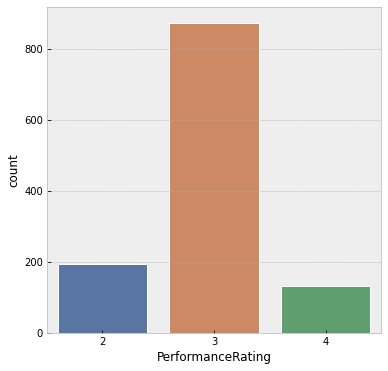

In [27]:
print(data.PerformanceRating.value_counts())
plt.style.use("bmh")
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1.25)
sns.set_style("darkgrid")
sns.countplot(x = data.PerformanceRating)
# sns.pie(data.PerformanceRating)

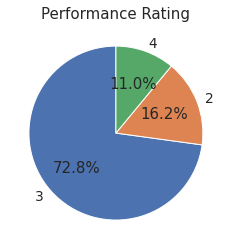

In [28]:
fig1, ax1 = plt.subplots()
x = data.PerformanceRating.unique()
y = data.PerformanceRating.value_counts()
w=(0.1,0,0)
plt.pie(y,autopct='%1.1f%%',labels=[3,2,4],startangle=90)
plt.title("Performance Rating")
plt.show()

In [29]:
data2 = data[data["PerformanceRating"]==2]

# Variable : Age
### INSIGHT
- Male>Female in company
- 25-50 Age Bucket

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



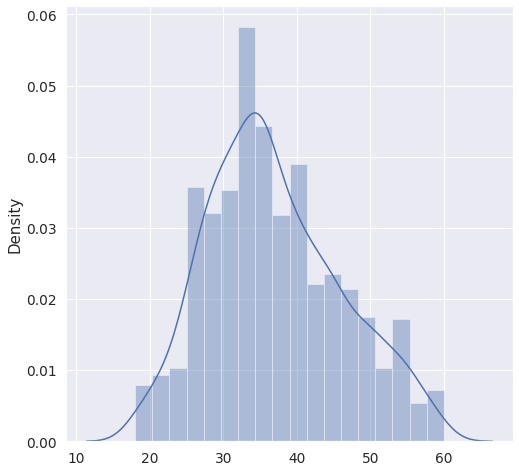

In [30]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(x = data.Age)

In [31]:
data.Age.describe()

count    1200.000000
mean       36.918333
std         9.087289
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

count      194
unique       2
top       Male
freq       119
Name: Gender, dtype: object


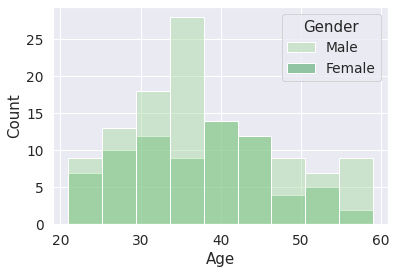

In [32]:
sns.histplot(data2,x = data2.Age,hue="Gender",palette="Greens")
print(data2.Gender.describe())

In [33]:
# Count male employees which are not working properly is 119 and female employees count is 75

2    194
Name: PerformanceRating, dtype: int64


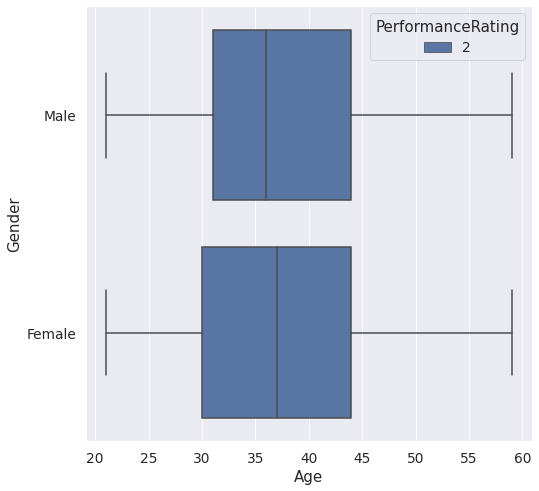

In [34]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
print(data2.PerformanceRating.value_counts())
# sns.histplot(data2,x = data2.Age,hue="PerformanceRating")
sns.boxplot(data = data2,x=data2.Age,y=data2.Gender,hue="PerformanceRating")

In [35]:
# Most of the people who are not working properly are around 30 to 45 year.

In [36]:
# Total 194 employees are not working properly in that 119 are male and other are female employees.

# Below 2 cell representing same things Gender/Rating/Age

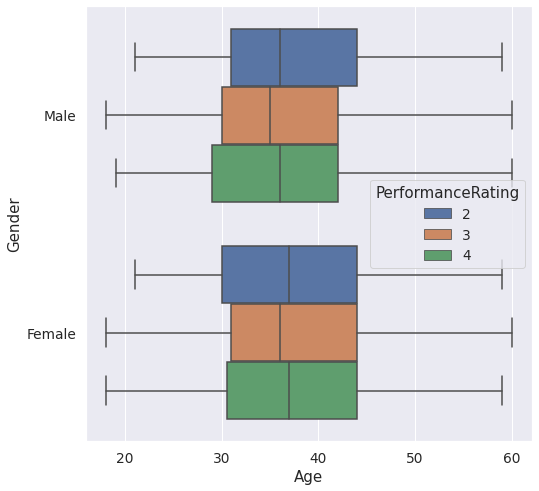

In [37]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = data,x=data.Age,y=data.Gender,hue="PerformanceRating")


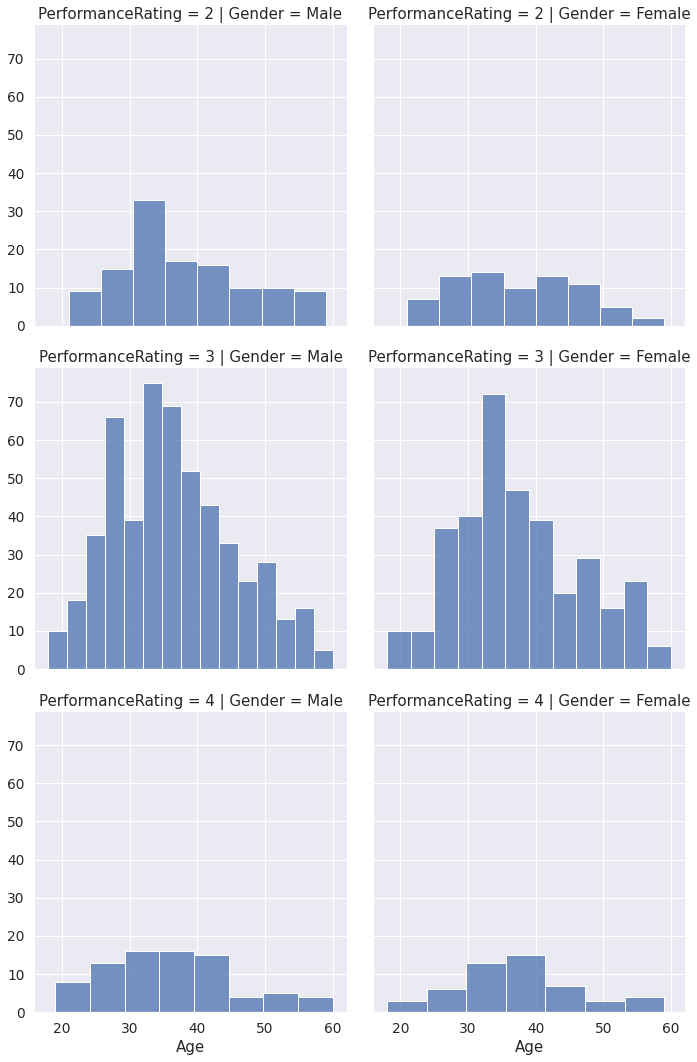

In [38]:
g = sns.FacetGrid(data,col="Gender",row = "PerformanceRating",height=5)
g.map(sns.histplot,"Age")

- peformance rating = 4 and gender = male/female -> youngester (Age Below 40)


# Variable : EducationBackground

In [39]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



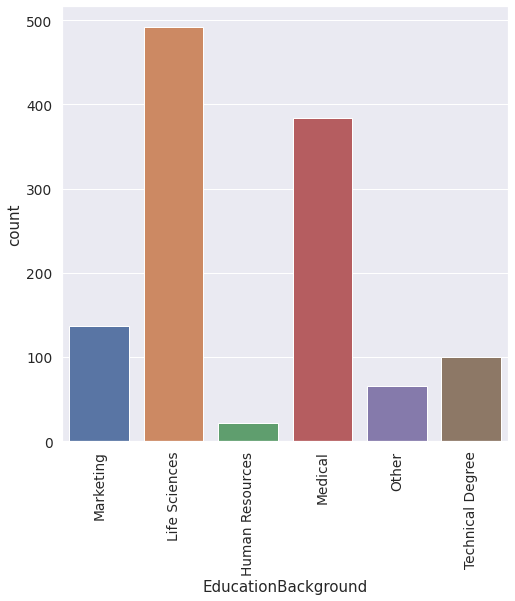

In [40]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation = 90)
sns.countplot(data.EducationBackground)
# sns.histplot(data = data,x=data.EducationBackground,hue="PerformanceRating")

In [41]:
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

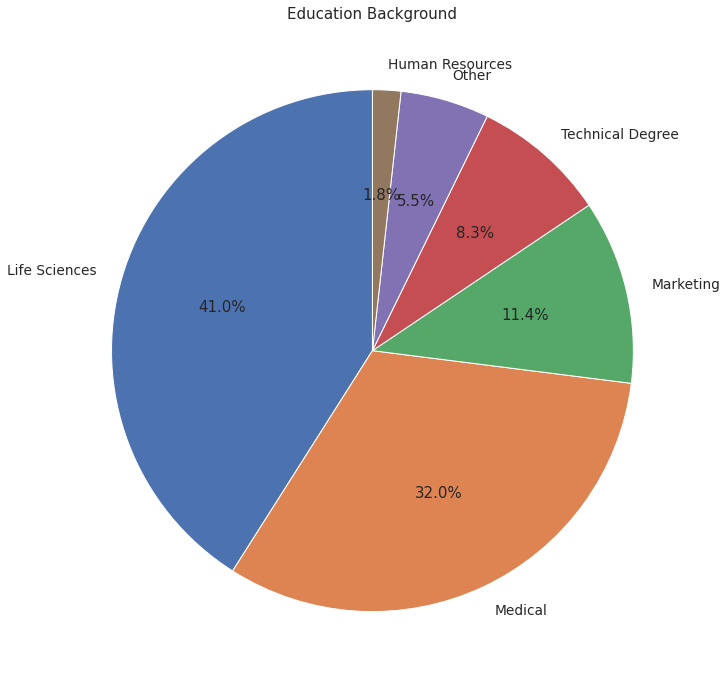

In [42]:
fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)
x = ['Life Sciences', 'Medical','Marketing','Technical Degree','Other','Human Resources']
y = data.EducationBackground.value_counts()
w=(0.1,0,0)
plt.pie(y,autopct='%1.1f%%',labels=x,startangle=90)
plt.title("Education Background")
plt.show()

- Your company heir most of it's employee having their eductional background in life science, Medical and Marketing.

Not working properly - Education Background statistics
Life Sciences       78
Medical             63
Marketing           29
Technical Degree    18
Other                3
Human Resources      3
Name: EducationBackground, dtype: int64


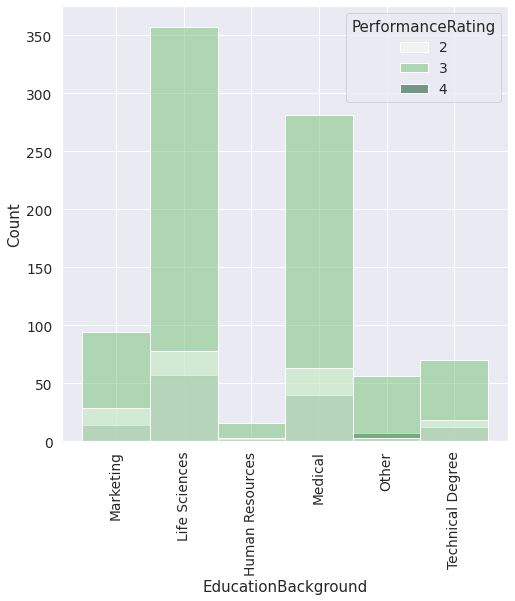

In [43]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation = 90)
print("Not working properly - Education Background statistics")
print(data2.EducationBackground.value_counts())
# sns.countplot(data.EducationBackground)
sns.histplot(data = data,x=data.EducationBackground,hue="PerformanceRating",palette="Greens")

# Variable : EmpDepartment

In [44]:
data.EmpDepartment.describe()

count      1200
unique        6
top       Sales
freq        373
Name: EmpDepartment, dtype: object

In [45]:
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

- Our model is more accurate on Sales Department, Development Department and Research & Development Department because we are having most of employees in those department.

Not working properly - Employee Department statistics
Sales                     87
Research & Development    68
Finance                   15
Development               13
Human Resources           10
Data Science               1
Name: EmpDepartment, dtype: int64


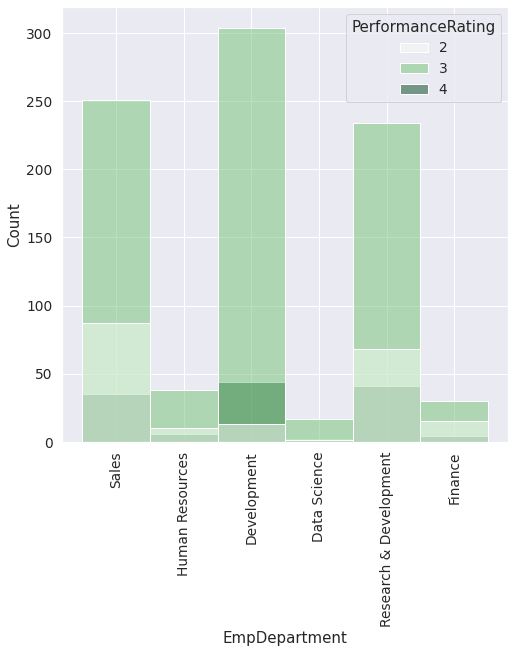

In [46]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
print("Not working properly - Employee Department statistics")
print(data2.EmpDepartment.value_counts())
sns.histplot(data,x = data.EmpDepartment,hue="PerformanceRating",palette="Greens")

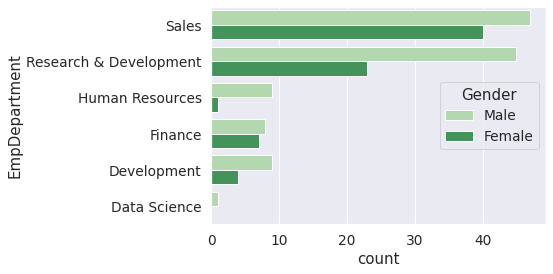

In [47]:
# plt.xticks(rotation=90)
sns.countplot(y=data2.EmpDepartment,hue=data2.Gender,palette="Greens")

EmpDepartment           Gender
Data Science            Male       1
Development             Male       9
                        Female     4
Finance                 Male       8
                        Female     7
Human Resources         Male       9
                        Female     1
Research & Development  Male      45
                        Female    23
Sales                   Male      47
                        Female    40
Name: Gender, dtype: int64


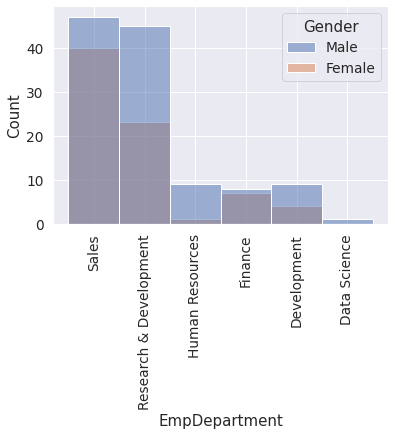

In [48]:
plt.xticks(rotation=90)
print(data2.groupby(["EmpDepartment"])["Gender"].value_counts())
sns.histplot(data2,x=data2.EmpDepartment,hue="Gender")

# Variable : EmpJobRole

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64


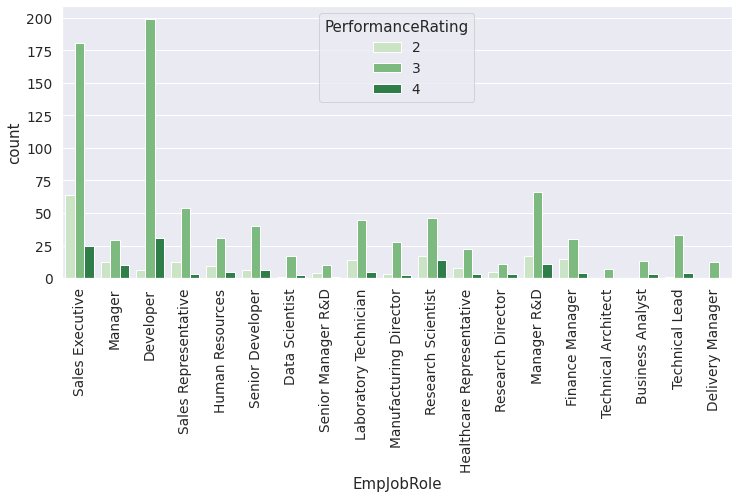

In [49]:
print(data.EmpJobRole.value_counts())
fig_dims = (12,5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.countplot(x=data.EmpJobRole,hue=data.PerformanceRating,palette="Greens")

Sales Executive              64
Research Scientist           17
Manager R&D                  17
Finance Manager              15
Laboratory Technician        14
Sales Representative         12
Manager                      12
Human Resources               9
Healthcare Representative     8
Developer                     6
Senior Developer              6
Research Director             5
Senior Manager R&D            4
Manufacturing Director        3
Technical Lead                1
Data Scientist                1
Name: EmpJobRole, dtype: int64


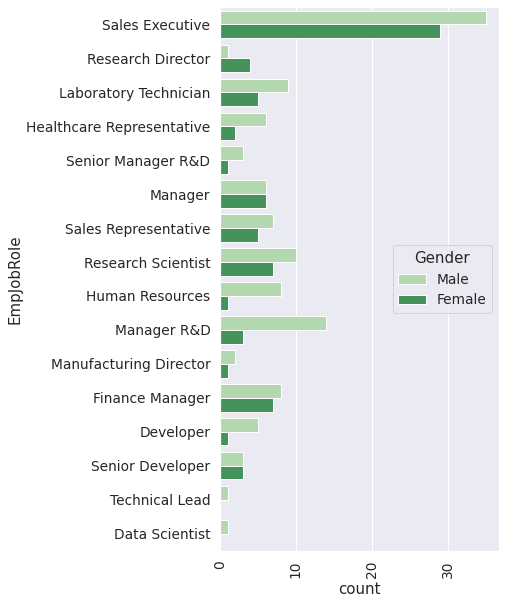

In [50]:
print(data2.EmpJobRole.value_counts())
fig_dims = (5,10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.countplot(y=data2.EmpJobRole,hue=data2.Gender,palette="Greens")

In [51]:
print(data2.groupby(["EmpDepartment"])["EmpJobRole"].value_counts())

EmpDepartment           EmpJobRole               
Data Science            Data Scientist                1
Development             Developer                     6
                        Senior Developer              6
                        Technical Lead                1
Finance                 Finance Manager              15
Human Resources         Human Resources               9
                        Manager                       1
Research & Development  Manager R&D                  17
                        Research Scientist           17
                        Laboratory Technician        14
                        Healthcare Representative     8
                        Research Director             5
                        Senior Manager R&D            4
                        Manufacturing Director        3
Sales                   Sales Executive              64
                        Sales Representative         12
                        Manager                      1

# Variable : MaritalStatus

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64


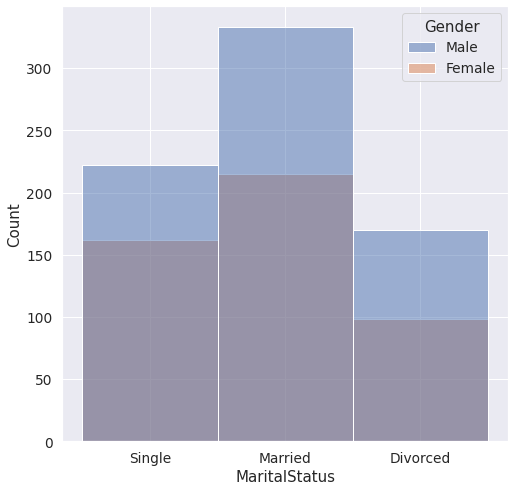

In [52]:
print(data.MaritalStatus.value_counts())
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data,x=data.MaritalStatus,hue="Gender")

# Variable : ExperienceYearsAtThisCompany

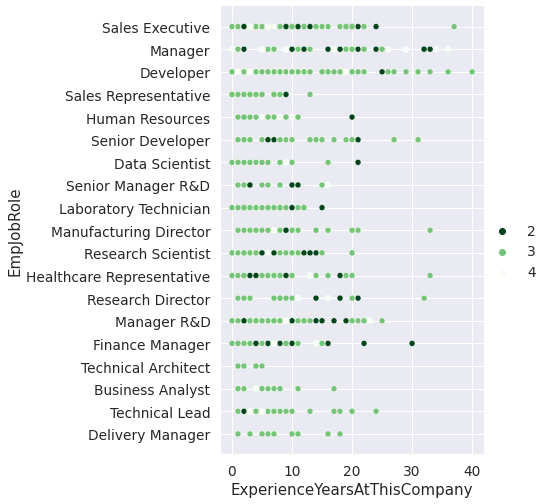

In [53]:
g = sns.FacetGrid(data,height = 7)
g.map_dataframe(sns.scatterplot, y="EmpJobRole", x="ExperienceYearsAtThisCompany",hue="PerformanceRating",palette="Greens_r")
g.set_axis_labels("ExperienceYearsAtThisCompany","EmpJobRole")
g.add_legend()

# Variable : DistanceFromHome

Distance From Home Is less than 12 km For majority of people.

In [54]:
data.DistanceFromHome.describe()

count    1200.000000
mean        9.165833
std         8.176636
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

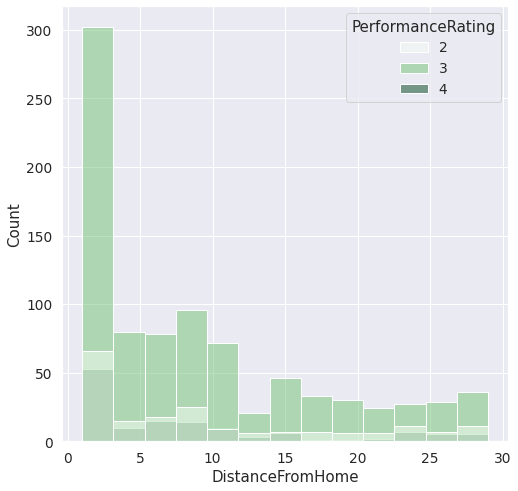

In [55]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x =data.DistanceFromHome,hue=data.PerformanceRating,palette="Greens")

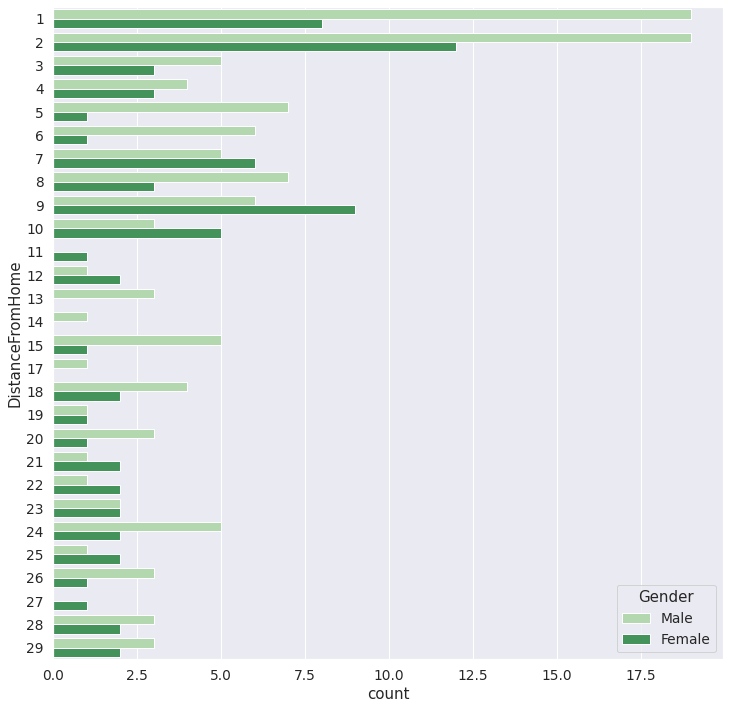

In [56]:
fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = data2.DistanceFromHome,hue=data.Gender,palette="Greens")

In [57]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r',
'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r'
, 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd',
'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest',
'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r',
'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r',
'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer',
'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r',
'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag',
'vlag_r', 'winter', 'winter_r'

('vlag_r', 'winter', 'winter_r')

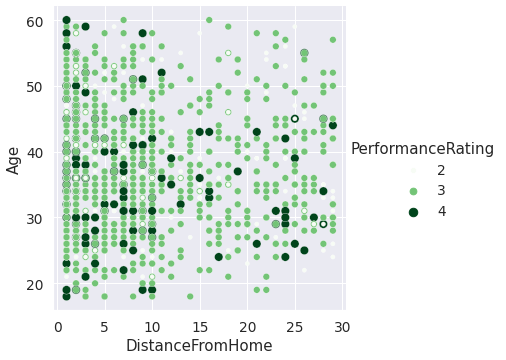

In [58]:
sns.relplot(x="DistanceFromHome", y="Age", hue="PerformanceRating",size="PerformanceRating", data=data,palette="Greens")

In [59]:
data.groupby("EmpDepartment").count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpDepartment,,,,,,,,,,,,,,,,,,,,,,,,,,,
Data Science,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Development,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361
Finance,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
Human Resources,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
Research & Development,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343
Sales,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373


# Variable : EmpEducationLevel

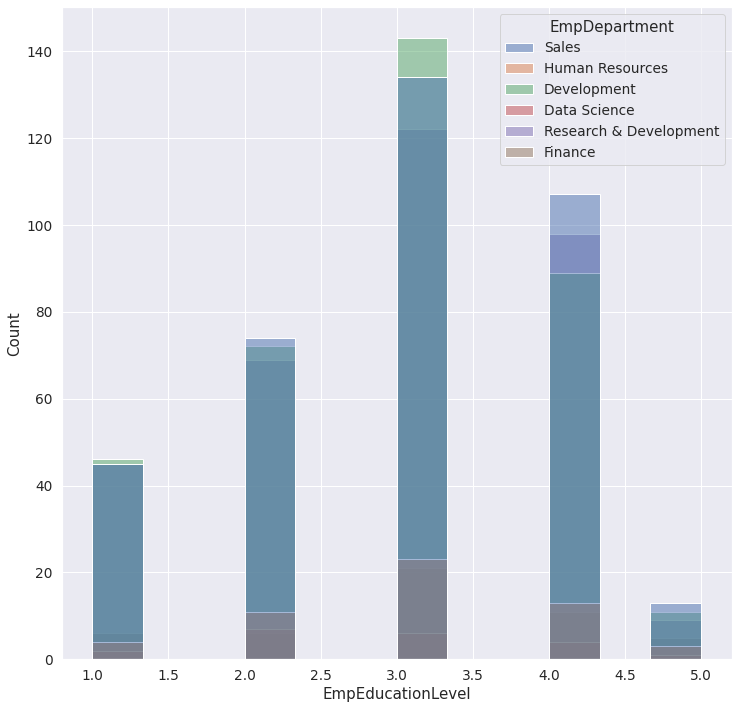

In [60]:
fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x = data.EmpEducationLevel,hue=data.EmpDepartment)

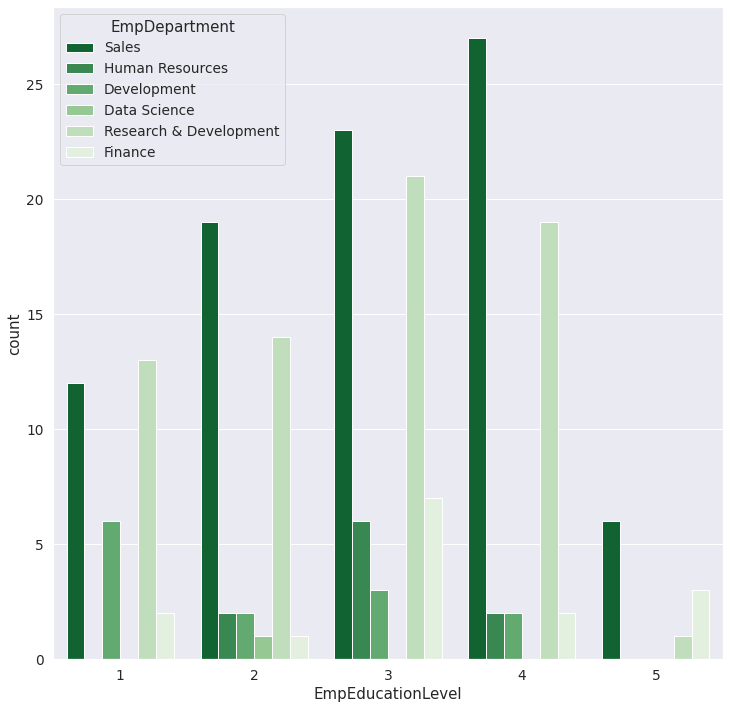

In [61]:
fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = data2.EmpEducationLevel,hue=data.EmpDepartment,palette="Greens_r")

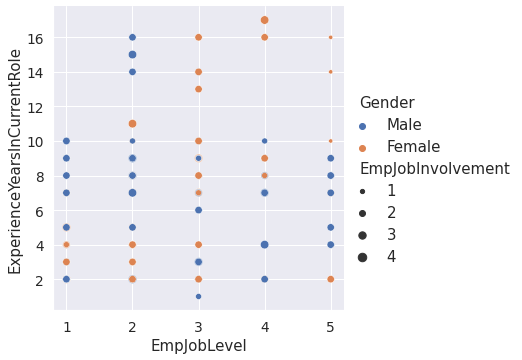

In [62]:
sns.relplot(x="EmpJobLevel", y="ExperienceYearsInCurrentRole",hue="Gender",size="EmpJobInvolvement", data=data2)

2    72
1    54
3    36
4    19
5    13
Name: EmpJobLevel, dtype: int64


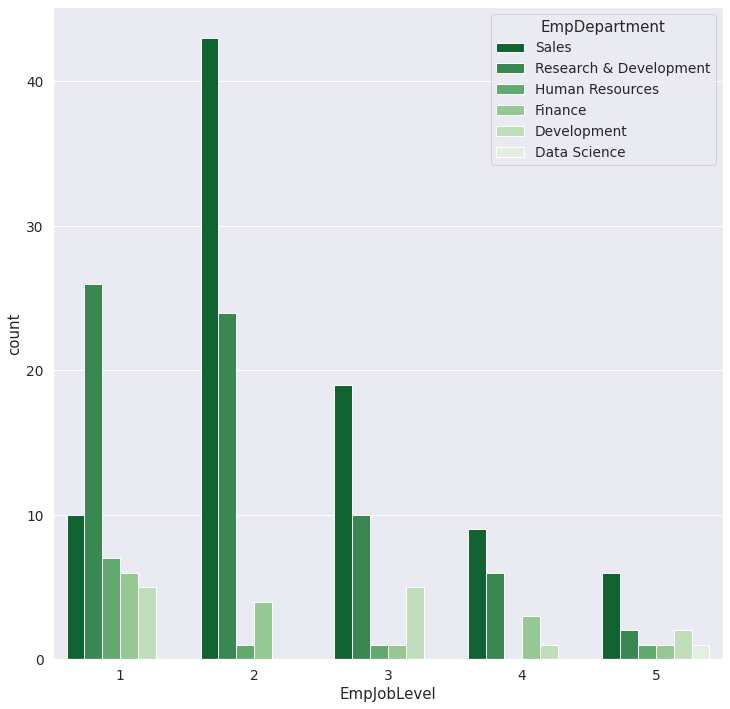

In [63]:
fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)
print(data2.EmpJobLevel.value_counts())
sns.countplot(x =data2.EmpJobLevel,hue=data2.EmpDepartment,palette="Greens_r")

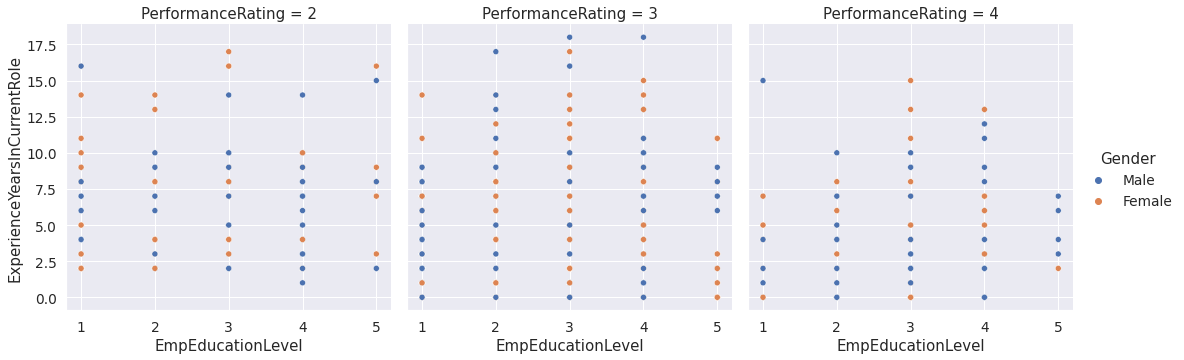

In [64]:
sns.relplot(x="EmpEducationLevel", y="ExperienceYearsInCurrentRole",col="PerformanceRating",data=data,hue="Gender")

EmpDepartment           EmpJobInvolvement
Data Science            3                     1
Development             3                    11
                        2                     1
                        4                     1
Finance                 3                     9
                        2                     3
                        4                     3
Human Resources         3                     8
                        2                     2
Research & Development  3                    43
                        2                    14
                        4                     7
                        1                     4
Sales                   3                    46
                        2                    26
                        1                     9
                        4                     6
Name: EmpJobInvolvement, dtype: int64


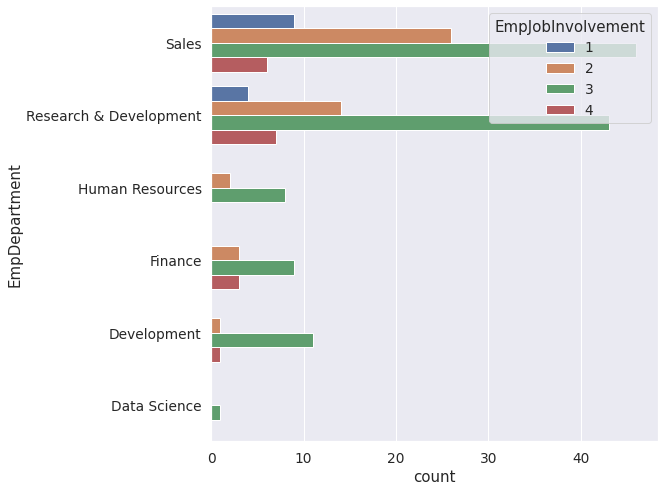

In [65]:
print(data2.groupby("EmpDepartment")["EmpJobInvolvement"].value_counts())
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(hue = data2.EmpJobInvolvement,y=data2.EmpDepartment)

2    445
3    413
5     98
4     98
1     56
6     46
0     44
Name: TrainingTimesLastYear, dtype: int64


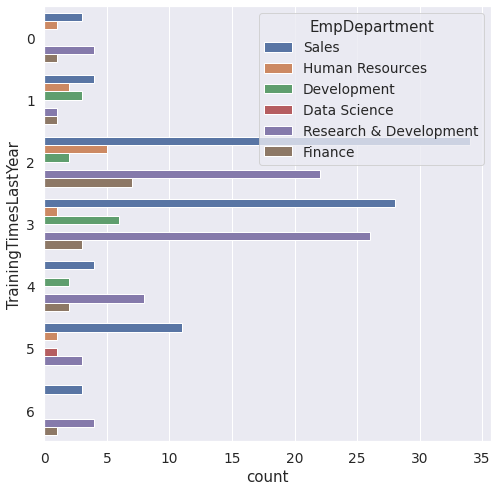

In [66]:
print(data.TrainingTimesLastYear.value_counts())
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = data2.TrainingTimesLastYear,hue=data.EmpDepartment)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [68]:
data.EmpHourlyRate.describe()

count    1200.000000
mean       65.981667
std        20.211302
min        30.000000
25%        48.000000
50%        66.000000
75%        83.000000
max       100.000000
Name: EmpHourlyRate, dtype: float64

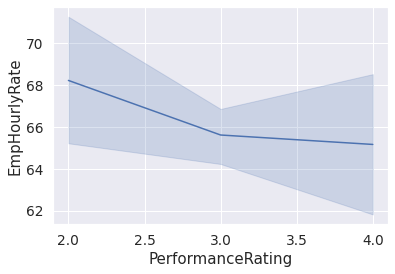

In [69]:
sns.lineplot(x=data.PerformanceRating,y=data.EmpHourlyRate)

count    194.000000
mean      15.072165
std        3.656912
min       11.000000
25%       12.000000
50%       14.000000
75%       17.750000
max       25.000000
Name: EmpLastSalaryHikePercent, dtype: float64


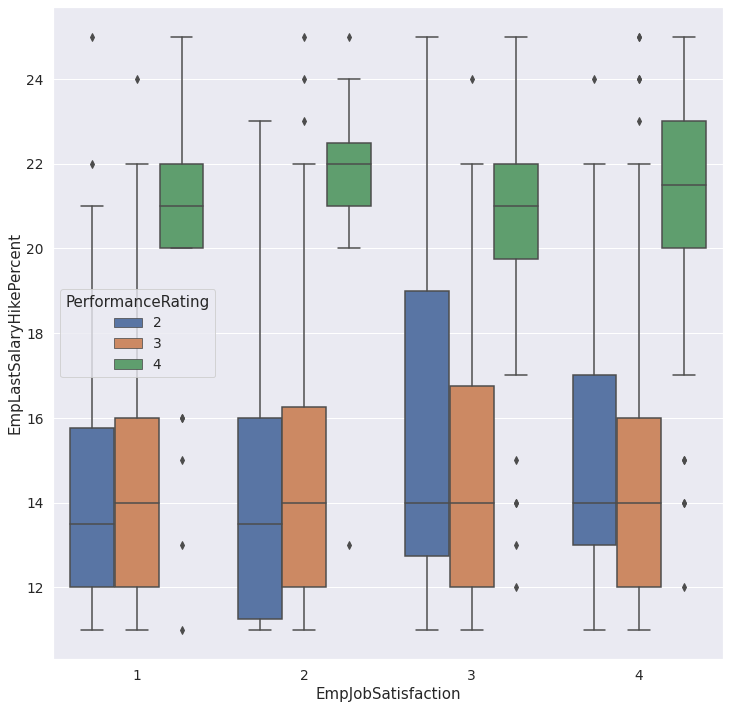

In [70]:
print(data2.EmpLastSalaryHikePercent.describe())
fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=data,y="EmpLastSalaryHikePercent",x="EmpJobSatisfaction",hue="PerformanceRating")

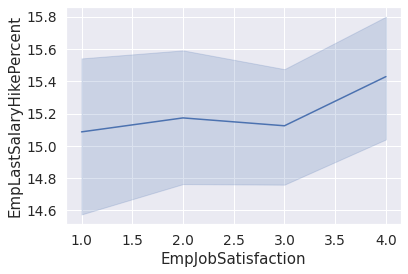

In [71]:
sns.lineplot(y=data.EmpLastSalaryHikePercent,x=data.EmpJobSatisfaction)

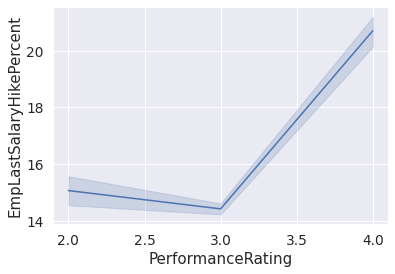

In [72]:
sns.lineplot(y=data.EmpLastSalaryHikePercent,x=data.PerformanceRating)

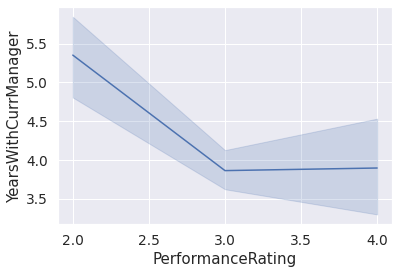

In [73]:
sns.lineplot(x=data.PerformanceRating,y=data.YearsWithCurrManager)

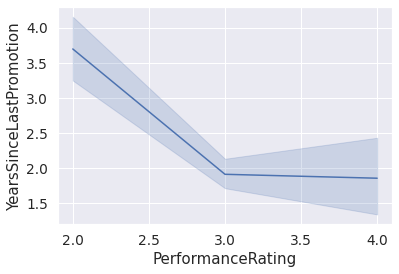

In [74]:
sns.lineplot(x=data.PerformanceRating,y=data.YearsSinceLastPromotion)

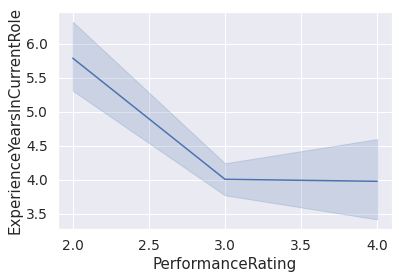

In [75]:
sns.lineplot(x=data.PerformanceRating,y=data.ExperienceYearsInCurrentRole)

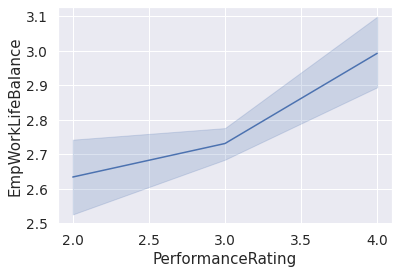

In [76]:
sns.lineplot(x=data.PerformanceRating,y=data.EmpWorkLifeBalance)

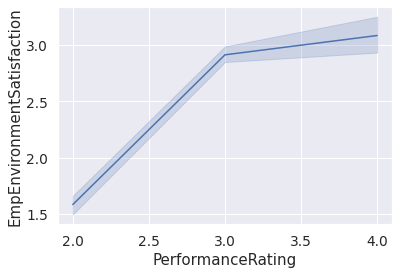

In [77]:
sns.lineplot(x=data.PerformanceRating,y=data.EmpEnvironmentSatisfaction)

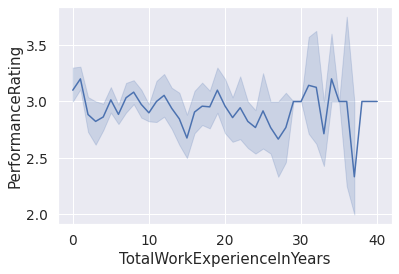

In [78]:
sns.lineplot(y=data.PerformanceRating,x=data.TotalWorkExperienceInYears)